# 🛒 E-Commerce Sales Analysis

This Jupyter Notebook demonstrates an **end-to-end analysis** of a real-world e-commerce dataset. It covers **data cleaning, exploratory analysis, and visualizations** using powerful Python libraries such as **Pandas, Matplotlib, Seaborn, and Plotly**.

In this project, I explore customer behavior, seasonal trends, and regional sales performance to uncover actionable insights. This analysis not only demonstrates my technical proficiency in handling and visualizing data but also illustrates my ability to extract meaningful business insights that can drive decision-making.


---

## 📥 1. Load Dataset & Initial Exploration

### **🔹 Step 1: Import Required Libraries**

In [1]:
# Install Necessary Modules
!pip install wordcloud

In [260]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate
from wordcloud import WordCloud

### **🔹 Step 2: Load and Inspect the Raw Data**
Let's load the dataset and perform an initial exploration to understand its structure and content..**


In [263]:
# Load Dataset
file_path = 'dataset/ecommerce_data.csv'
raw_data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [264]:
# Display dataset information and basic statistics
print("Raw Data Information:")
raw_data.info()

print("\nDescriptive Statistics:")
print(raw_data.describe())

print("\nFirst few rows of raw data:")
print(raw_data.head())

Raw Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Descriptive Statistics:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.

### **🔹 Step 3: Explore Data**
- **Check unique values in categorical columns** to understand product distribution.
- **Detect negative values in Quantity & UnitPrice**, which may indicate returns.


In [266]:
# Explore categorical columns: Country and Product Descriptions
print("\nNumber of unique countries:", raw_data['Country'].nunique())
print("Number of unique products:", raw_data['Description'].nunique())


Number of unique countries: 38
Number of unique products: 4223


In [268]:
# Summary for numerical columns 'Quantity' and 'UnitPrice'
print("\nSummary of 'Quantity' and 'UnitPrice':")
print(raw_data[['Quantity', 'UnitPrice']].describe())


Summary of 'Quantity' and 'UnitPrice':
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


#### 📌 Key Findings from the Data Exploration

- **Dataset Size:** 541,909 transactions with 8 columns.
- **Key Columns:** `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, `Country`.
- **Unique Values:**
  - **Countries:** 38
  - **Products:** 4,223

**Observations:**
- **Negative Values:**  
  - Some negative values appear in **Quantity** and **UnitPrice**.  
  - *Interpretation:* In retail datasets, negative quantities typically represent **returns/refunds**. Negative unit prices may be tied to such adjustments.

---

## 🧹 2. Data Cleaning

### **🔹 Step 1: Handling Missing Values & Incomplete Records**
We start by checking for missing values and flagging incomplete rows (e.g., missing descriptions, zero prices, or missing customer IDs).


In [274]:
# Calculate and display the percentage of missing values
missing_percentage = raw_data.isnull().mean() * 100
print("\nPercentage of missing values in raw data:")
print(missing_percentage)


Percentage of missing values in raw data:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [276]:
# Identify rows with missing 'Description'
missing_description = raw_data[raw_data['Description'].isnull()]
print("\nRows with missing descriptions:")
print(missing_description.head())
print("\nSummary of rows with missing descriptions (for 'Quantity', 'UnitPrice', 'CustomerID'):")
print(missing_description[['Quantity', 'UnitPrice', 'CustomerID']].describe())



Rows with missing descriptions:
     InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970    536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971    536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972    536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987    536549    85226A         NaN         1  12/1/2010 14:34        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom  

Summary of rows with missing descriptions (for 'Quantity', 'UnitPrice', 'CustomerID'):
          Quantity  UnitPrice  CustomerID
count  1454.000000     1454.0         0.0
mean     -9.359697        0.0         NaN
std     243.238758        0.0         NaN
min   -3667.000000        0.0   

In [278]:
# Check additional patterns for missing descriptions
print("\nNumber of rows with missing 'CustomerID' among missing descriptions:",
      missing_description['CustomerID'].isnull().sum())
print("\nDistribution of 'UnitPrice' for missing descriptions:")
print(missing_description['UnitPrice'].value_counts())


Number of rows with missing 'CustomerID' among missing descriptions: 1454

Distribution of 'UnitPrice' for missing descriptions:
UnitPrice
0.0    1454
Name: count, dtype: int64


In [280]:
# Flag incomplete rows (missing Description, UnitPrice == 0, or missing CustomerID)
raw_data['IsIncomplete'] = raw_data['Description'].isnull() | (raw_data['UnitPrice'] == 0.0) | raw_data['CustomerID'].isnull()
incomplete_data = raw_data[raw_data['IsIncomplete']]
print("\nNumber of incomplete rows identified:", len(incomplete_data))
print("Preview of incomplete rows:")
print(incomplete_data.head())


Number of incomplete rows identified: 135120
Preview of incomplete rows:
     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  IsIncomplete  
622   12/1/2010 11:52       0.00         NaN  United Kingdom          True  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom          True  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom          True  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom          True  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom          True  


#### 📌 Key Findings
- **Missing Descriptions:**  
  - Approximately 0.27% of rows have missing product descriptions.  
  - *Interpretation:* These rows often also lack `UnitPrice` and `CustomerID`, suggesting they may be **incomplete transactions**, **promotional entries**, or **non-product records**.
 
- **Missing Values:**  
  - The `CustomerID` is missing in about **24.93%** of transactions, which can occur with guest checkouts in online retail.
- **Incomplete Transactions:**  
  - Approximately 135,120 rows are flagged as incomplete due to missing values in key fields.  
  - *Action:* These rows were marked for further review.

### **🔹 Step 2: Normalizing and Inspecting Text Data**

To process product descriptions consistently, we normalize text and inspect the least common entries using a WordClou.


In [284]:
# Normalize 'Description' to lowercase (replace missing values with an empty string)
raw_data['NormalizedDescription'] = raw_data['Description'].fillna("").str.lower()

# Count occurrences of each unique description
description_counts = raw_data['NormalizedDescription'].value_counts()

In [285]:
# Display the least common descriptions in a table
table_data = pd.DataFrame({
    'Description': description_counts.tail(10).index,
    'Frequency': description_counts.tail(10).values
})
print("\nLeast Common Descriptions:")
print(tabulate(table_data, headers='keys', tablefmt='grid'))


Least Common Descriptions:
+----+-------------------------------------+-------------+
|    | Description                         |   Frequency |
+====+=====================================+=============+
|  0 | pink allium  artificial flower      |           1 |
+----+-------------------------------------+-------------+
|  1 | mouldy, unsaleable.                 |           1 |
+----+-------------------------------------+-------------+
|  2 | gardeners kneeling pad              |           1 |
+----+-------------------------------------+-------------+
|  3 | country cottage  doorstop green     |           1 |
+----+-------------------------------------+-------------+
|  4 | watering can single hook pistachio  |           1 |
+----+-------------------------------------+-------------+
|  5 | set/6 ivory bird t-light candles    |           1 |
+----+-------------------------------------+-------------+
|  6 | incorrectly made-thrown away.       |           1 |
+----+----------------------

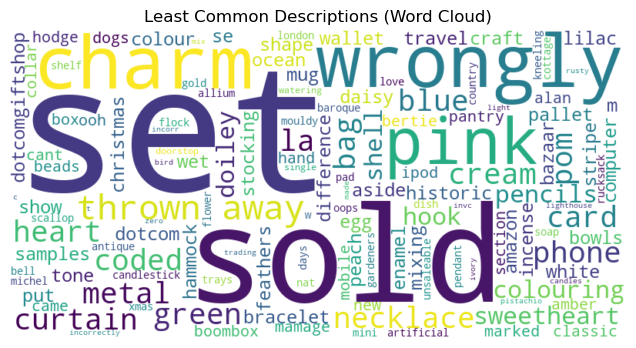

In [288]:
# Generate Word Cloud from least common descriptions for visual inspection
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(description_counts.tail(50).index))
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Least Common Descriptions (Word Cloud)')
plt.show()

In [290]:
# Analyze description lengths to identify anomalies
raw_data['DescriptionLength'] = raw_data['NormalizedDescription'].str.len()
shortest_descriptions = raw_data.sort_values(by='DescriptionLength').head(20)
longest_descriptions = raw_data.sort_values(by='DescriptionLength', ascending=False).head(20)
print("\nShortest Descriptions (with InvoiceNo & StockCode):")
print(shortest_descriptions[['Description', 'InvoiceNo', 'StockCode']])
print("\nLongest Descriptions (with InvoiceNo & StockCode):")
print(longest_descriptions[['Description', 'InvoiceNo', 'StockCode']])


Shortest Descriptions (with InvoiceNo & StockCode):
       Description InvoiceNo StockCode
7194           NaN    537002     21651
52379          NaN    540778    84029E
150594         NaN    549455    84858C
279637         NaN    561354     21792
150595         NaN    549456    47341A
390428         NaN    570520     23412
314906         NaN    564667     23084
220571         NaN    556200    84796B
173352         NaN    551695     22467
418127         NaN    572699     72818
136090         NaN    547928    37444B
52262          NaN    540699      POST
136089         NaN    547927    37444C
279708         NaN    561361     21294
279709         NaN    561362    84415A
137184         NaN    548095     20850
52217          NaN    540696    84562A
150155         NaN    549345     20748
52216          NaN    540695     21661
52215          NaN    540694     71477

Longest Descriptions (with InvoiceNo & StockCode):
                                Description InvoiceNo StockCode
71969   SET/

### **🔹 Step 3: Removing Erroneous or Irrelevant Data**

We now identify and remove placeholder descriptions, very short descriptions, and cancelled transaction.


#### 📌 Identifying Placeholder Descriptions
To ensure data quality, we identified descriptions that might be **system-generated placeholders** or **erroneous entries**. Using the **WordCloud visualization**, we detected patterns in rare descriptions, revealing that some descriptions contain generic terms like `test`, `sample`, `unknown`, `barcode`, `damage`, `lost`, and similar words. These words suggest:

- **Test Entries:** Data created for system testing (`test`, `sample`).
- **Incomplete or Faulty Records:** Rows where descriptions indicate missing or incorrect data (`unknown`, `barcode`, `?`).
- **Damaged or Lost Products:** Indications of stock issues (`damage`, `broken`, `lost`, `thrown`).
- **Mislabeling or Wrong Entries:** Cases where the wrong product might have been logged (`wrong`, `wrongly`).

To flag these descriptions, we applied the following filtering logic:
```python
placeholder_descriptions = data[
    data['NormalizedDescription'].str.contains(
        'test|sample|unknown|placeholder|barcode|\?|damage|wrong|wrongly|lost|broken|thrown', 
        na=False, regex=True
    )
]
```
This ensures that any potentially unreliable or invalid product descriptions are **identified for further inspection or removal** before performing deeper analysis.


In [293]:
# Identify placeholder descriptions using specific keywords
placeholder_keywords = 'test|sample|unknown|placeholder|barcode|\?|damage|wrong|wrongly|lost|broken|thrown'
placeholder_descriptions = raw_data[raw_data['NormalizedDescription'].str.contains(placeholder_keywords, na=False, regex=True)]
print("\nIdentified Placeholder Descriptions (for further inspection):")
print(placeholder_descriptions[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID']])


Identified Placeholder Descriptions (for further inspection):
       InvoiceNo StockCode      Description  Quantity  UnitPrice  CustomerID
7313      537032     21275                ?       -30       0.00         NaN
13264     537432    35833G          damages       -43       0.00         NaN
14436    C537581         S          SAMPLES        -1      12.95         NaN
14437    C537581         S          SAMPLES        -1      52.00         NaN
21518     538090     20956                ?      -723       0.00         NaN
...          ...       ...              ...       ...        ...         ...
524370    580547     21201              ???      -390       0.00         NaN
535324    581201     22217         damages?      -155       0.00         NaN
535327    581204     85104  ????damages????      -355       0.00         NaN
535328    581205     20893          damages       -55       0.00         NaN
535335    581212     22578             lost     -1050       0.00         NaN

[312 rows x 

In [294]:
# Remove placeholder descriptions from the dataset
clean_data = raw_data.drop(placeholder_descriptions.index)
print(f"\nRemoved {len(placeholder_descriptions)} placeholder descriptions.")


Removed 312 placeholder descriptions.


In [298]:
# Identify and remove short descriptions (length <= 3)
short_descriptions = clean_data[clean_data['NormalizedDescription'].str.len() <= 3]
print("\nShort Descriptions identified for removal:")
print(short_descriptions[['Description', 'InvoiceNo', 'StockCode']])
clean_data = clean_data.drop(short_descriptions.index)
print(f"Removed {len(short_descriptions)} short descriptions.")


Short Descriptions identified for removal:
       Description InvoiceNo StockCode
622            NaN    536414     22139
1970           NaN    536545     21134
1971           NaN    536546     22145
1972           NaN    536547     37509
1987           NaN    536549    85226A
...            ...       ...       ...
535322         NaN    581199     84581
535326         NaN    581203     23406
535332         NaN    581209     21620
536981         NaN    581234     72817
538554         NaN    581408     85175

[1457 rows x 3 columns]
Removed 1457 short descriptions.


In [299]:
# Identify and remove cancelled transactions (InvoiceNo starting with 'C')
cancelled_transactions = clean_data[clean_data['InvoiceNo'].str.startswith('C')]
print("\nCancelled Transactions identified for removal:")
print(cancelled_transactions)
clean_data = clean_data.drop(cancelled_transactions.index)
print(f"Removed {len(cancelled_transactions)} cancelled transactions.")


Cancelled Transactions identified for removal:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country 

**📌 Note**: While duplicates were dropped to avoid overcounting, in some contexts (e.g., basket analysis) retaining duplicates might provide additional insights.

In [303]:
# Save all removed transactions for review
dropped_transactions = pd.concat([placeholder_descriptions, short_descriptions, cancelled_transactions])
dropped_transactions.to_csv('dropped_transactions.csv', index=False)
print(f"\n{len(dropped_transactions)} transactions saved to 'dropped_transactions.csv' for further analysis.")


10996 transactions saved to 'dropped_transactions.csv' for further analysis.


In [305]:
# Verify the cleanup by checking the number of remaining transactions
print(f"\nRemaining transactions after cleanup: {len(clean_data)}")


Remaining transactions after cleanup: 530913


### **🔹 Step 4: Additional Data Cleaning**

We now handle duplicate transactions, negative quantities, and zero unit prices. Finally, we convert the date column for time series analysi.


In [308]:
# Detect potential duplicate transactions based on key columns
duplicate_transactions = clean_data.duplicated(subset=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice'], keep=False)
print("\nPotential Duplicate Transactions (may include valid multiple-item orders):")
print(clean_data[duplicate_transactions])


Potential Duplicate Transactions (may include valid multiple-item orders):
       InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice 

Note: This is not exactly the duplicates that we are looking for since customers might ordered several items in one order.

In [311]:
# Identify true duplicates by counting (InvoiceNo, StockCode) occurrences
duplicate_counts = clean_data.groupby(['InvoiceNo', 'StockCode']).size()
true_duplicates = duplicate_counts[duplicate_counts > 1].reset_index()
true_duplicates.columns = ['InvoiceNo', 'StockCode', 'Count']
print("\nDuplicate Transactions (Same InvoiceNo & StockCode appearing multiple times):")
print(true_duplicates.head(20))
print(f"Total duplicate (InvoiceNo, StockCode) entries found: {len(true_duplicates)}")


Duplicate Transactions (Same InvoiceNo & StockCode appearing multiple times):
   InvoiceNo StockCode  Count
0     536381     71270      2
1     536409     21866      2
2     536409     22111      2
3     536409     22866      2
4     536409     22900      2
5     536409     85116      2
6     536409    90199C      3
7     536412     21448      5
8     536412     21706      2
9     536412     21708      2
10    536412     21738      3
11    536412     22077      3
12    536412     22141      2
13    536412     22144      2
14    536412     22243      3
15    536412     22273      3
16    536412     22327      2
17    536412     22569      2
18    536412     22749      3
19    536412     22759      2
Total duplicate (InvoiceNo, StockCode) entries found: 9599


In [313]:
# Drop duplicates (keeping the first occurrence)
clean_data = clean_data.drop_duplicates(subset=['InvoiceNo', 'StockCode'], keep='first')
print(f"\nRemaining transactions after dropping duplicates: {len(clean_data)}")


Remaining transactions after dropping duplicates: 520378


In [315]:
# Handle Negative Quantities
negative_quantity_transactions = clean_data[clean_data['Quantity'] < 0]
print("\nNegative Quantity Transactions:")
print(negative_quantity_transactions.head(20))
print(f"Total negative quantity transactions found: {len(negative_quantity_transactions)}")


Negative Quantity Transactions:
       InvoiceNo StockCode                 Description  Quantity  \
13217     537425    84968F                       check       -20   
13218     537426    84968E                       check       -35   
21338     538072     22423                      faulty       -13   
22296     538161    46000S                Dotcom sales      -100   
22297     538162    46000M                Dotcom sales      -100   
42564     540010     22501  reverse 21/5/10 adjustment      -100   
42566     540012     22502  reverse 21/5/10 adjustment      -100   
55189     540978     84050                     counted      -310   
65063     541685     22351                  Given away     -1400   
65077     541687    46000S                      Dotcom      -300   
72006     542225     85096                label mix up       -59   
107041    545401     21769                    showroom        -5   
108577    545546    84249A                       check      -150   
113580    54599

In [317]:
# Handle Zero Unit Price Transactions
zero_price_transactions = clean_data[clean_data['UnitPrice'] == 0.0]
print("\nTransactions with Zero Unit Price:")
print(zero_price_transactions.head(20))
print(f"Total transactions with zero unit price found: {len(zero_price_transactions)}")


Transactions with Zero Unit Price:
      InvoiceNo StockCode                       Description  Quantity  \
6391     536941     22734                            amazon        20   
6392     536942     22139                            amazon        15   
9302     537197     22841      ROUND CAKE TIN VINTAGE GREEN         1   
13217    537425    84968F                             check       -20   
13218    537426    84968E                             check       -35   
14335    537534     85064      CREAM SWEETHEART LETTER RACK         1   
14336    537534     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   
14337    537534     84692       BOX OF 24 COCKTAIL PARASOLS         2   
14338    537534     48184             DOORMAT ENGLISH ROSE          3   
14339    537534     48111             DOORMAT 3 SMILEY CATS         1   
14340    537534     22697   GREEN REGENCY TEACUP AND SAUCER         1   
14341    537534     22682     FRENCH BLUE METAL DOOR SIGN 7         1   
14342    537534

In [319]:
# Remove zero-price transactions from the dataset
clean_data = clean_data[clean_data['UnitPrice'] > 0]
print(f"\nRemaining transactions after removing zero-price transactions: {len(clean_data)}")


Remaining transactions after removing zero-price transactions: 519580


In [321]:
# Check for missing or incorrect country names
print("\nChecking for missing or incorrect country names...")
print("Missing country values count:", clean_data['Country'].isnull().sum())
print("Unique country names:", clean_data['Country'].unique())


Checking for missing or incorrect country names...
Missing country values count: 0
Unique country names: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [323]:
# Convert 'InvoiceDate' to datetime format and set as index for time-series analysis
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate'], errors='coerce')
clean_data.set_index('InvoiceDate', inplace=True)
print("\nConverted 'InvoiceDate' to datetime format and set as index.")


Converted 'InvoiceDate' to datetime format and set as index.


---

## 📊 3. Data Analysis & Visualization

### **🔹 Step 1: Sales Analysis by Country**

We calculate the total sales and visualize the top countries by ales.


In [326]:
# Aggregate Total Sales by Country
clean_data['TotalSales'] = clean_data['Quantity'] * clean_data['UnitPrice']

In [328]:
# Aggregate Total Sales by Country and sort descending
country_sales = clean_data.groupby('Country')['TotalSales'].sum().reset_index()
country_sales = country_sales.sort_values(by='TotalSales', ascending=False)
print("\nTotal Sales by Country (Top 10):")
print(country_sales.head(10))


Total Sales by Country (Top 10):
           Country   TotalSales
36  United Kingdom  8956428.923
24     Netherlands   285446.340
10            EIRE   281894.700
14         Germany   227618.610
13          France   209511.160
0        Australia   138420.610
31           Spain    61452.200
33     Switzerland    56974.250
3          Belgium    41196.340
32          Sweden    38367.830


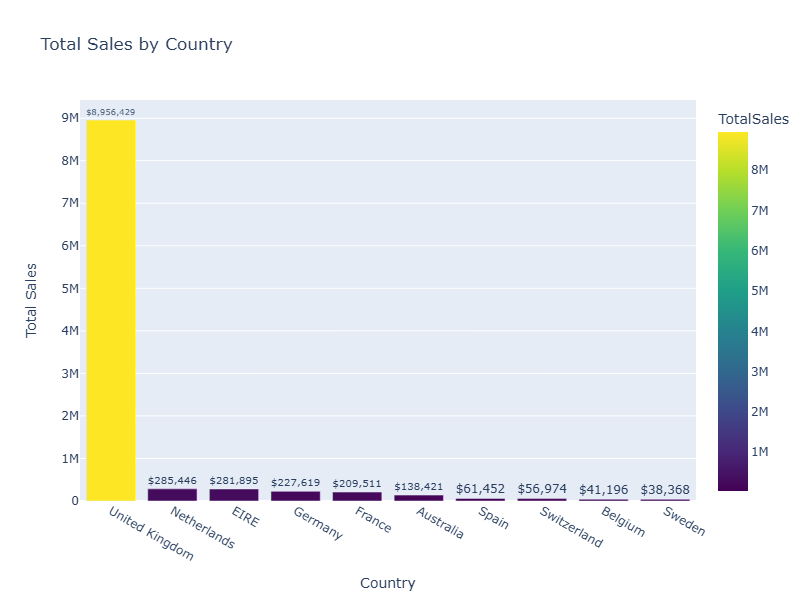

In [330]:
# Create a bar plot for Total Sales by Country
fig_country_sales = px.bar(country_sales.head(10),
                           x='Country', y='TotalSales',
                           title='Total Sales by Country',
                           color='TotalSales',
                           text=country_sales.head(10)['TotalSales'].apply(lambda x: f"${x:,.0f}"),
                           color_continuous_scale='viridis')
fig_country_sales.update_traces(textposition='outside')
fig_country_sales.update_layout(xaxis_title="Country",
                                yaxis_title="Total Sales",
                                bargap=0.2,
                                height=600)
fig_country_sales.show()

**📌 Country-Level Sales:**  
  - The **United Kingdom** dominates with total sales of approximately **$8.96M**.
  - Other top countries include **Netherlands**, **EIRE**, **Germany**, and **France**.

### **🔹 Step 2: Top 10 Products by Total Sales**

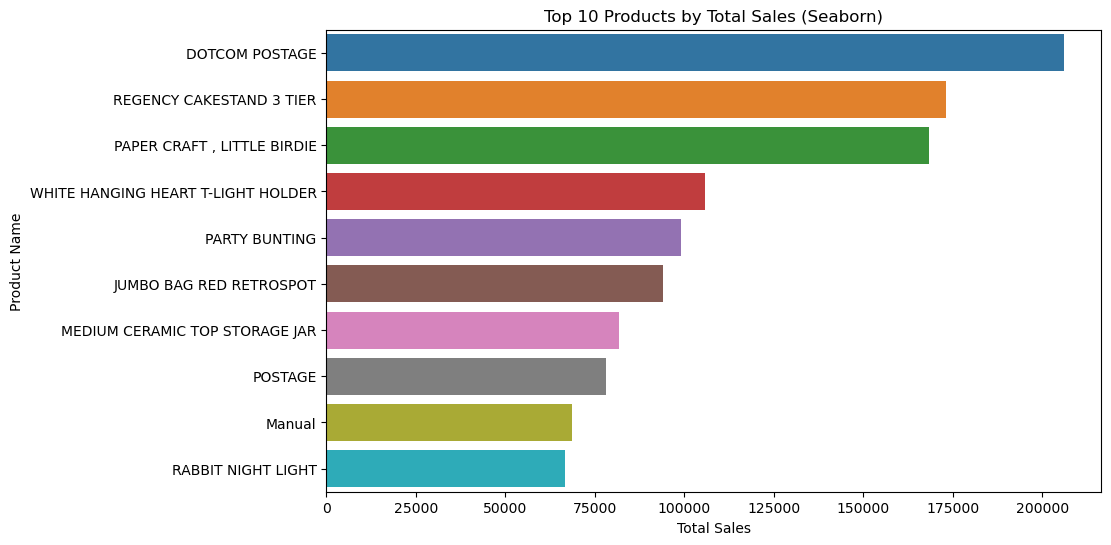

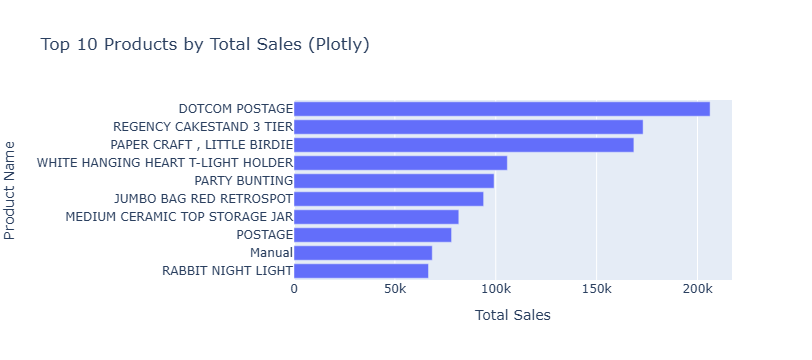

In [346]:
# Top 10 Products by Total Sales 
if 'TotalSales' in clean_data.columns and 'Description' in clean_data.columns:
    top_products = clean_data.groupby('Description')['TotalSales'].sum().nlargest(10).reset_index()

    # Fore Seaborn visualizations
    plt.figure(figsize=(10, 6))
    sns.barplot(x='TotalSales', y='Description', data=top_products)
    plt.title('Top 10 Products by Total Sales (Seaborn)')
    plt.xlabel('Total Sales')
    plt.ylabel('Product Name')
    plt.show()

    # For interactive Plotly visualizations
    fig_bar = px.bar(top_products, x='TotalSales', y='Description',
                     title='Top 10 Products by Total Sales (Plotly)', orientation='h')
    fig_bar.update_layout(xaxis_title='Total Sales', yaxis_title='Product Name')
    fig_bar.update_yaxes(autorange='reversed')  # To show them in descending order
    fig_bar.show()

**📌 Key Insight:**
- focusing on the top 10 products by **TotalSales** helps in identifying best-selling items for targeted marketing an inventory optimization.

### **🔹 Step 3: Time Series Analysis**

We explore yearly, monthly, and weekly sales trend.


In [337]:
# Yearly Sales Trend using resampling
yearly_sales = clean_data['TotalSales'].resample('Y').sum().reset_index()
print("\nYearly Sales Trend:")
print(yearly_sales)


Yearly Sales Trend:
  InvoiceDate   TotalSales
0  2010-12-31   812278.130
1  2011-12-31  9774674.553


**📌 Yearly Trend:**
  - Sales grow dramatically from **December 2010 (812k)** to **December 2011 (9.77M)**.  
  - *Note:* Since 2010 data only covers December, a monthly breakdown is necessary.
    
In order to understand trends, we should compare month-to-month growth within 2011.


Monthly Sales Trend (first few records):
  InvoiceDate  TotalSales
0  2010-12-31  812278.130
1  2011-01-31  686697.280
2  2011-02-28  520741.020
3  2011-03-31  713846.910
4  2011-04-30  531832.811


C:\Users\Hyeri\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



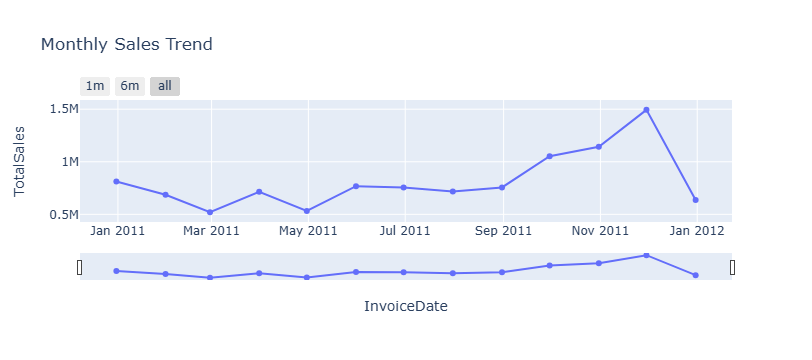

In [340]:
# Analyze Monthly Sales Trend
monthly_sales = clean_data['TotalSales'].resample('M').sum().asfreq('M', fill_value=0).reset_index()
print("\nMonthly Sales Trend (first few records):")
print(monthly_sales.head())

fig_monthly_sales = px.line(monthly_sales, x='InvoiceDate', y='TotalSales',
                            title='Monthly Sales Trend', markers=True)
fig_monthly_sales.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)
fig_monthly_sales.show()

**📌 Monthly Trend:**
- December 2010 (812k) shows a peak, followed by a dip in January 2011 (686k) (possibly due to a post-holiday slowdown)
- March 2011 (713k) had a sales recovery, suggesting a potential seasonal trend
- *Seasonal Insight:* **Holiday demand** significantly boosts December sales.


Weekly Sales Trend (first few records):
  InvoiceDate  TotalSales
0  2010-12-05   183588.44
1  2010-12-12   326774.48
2  2010-12-19   212736.29
3  2010-12-26    89178.92
4  2011-01-02        0.00


C:\Users\Hyeri\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



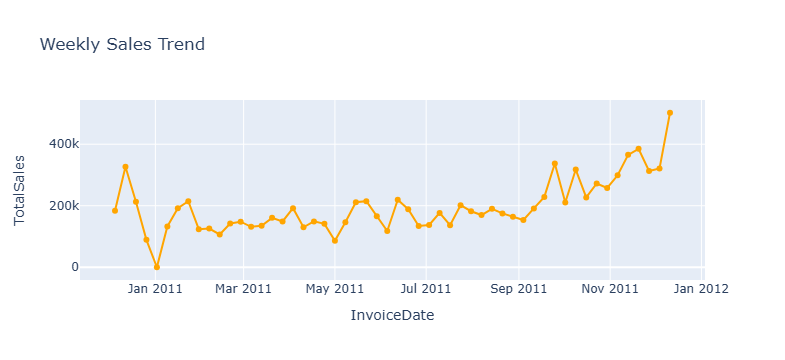

In [173]:
# Analyze Weekly Sales Trend
weekly_sales = clean_data['TotalSales'].resample('W').sum().asfreq('W', fill_value=0).reset_index()
print("\nWeekly Sales Trend (first few records):")
print(weekly_sales.head())

fig_weekly_sales = px.line(weekly_sales, x='InvoiceDate', y='TotalSales',
                           title='Weekly Sales Trend', markers=True,
                           color_discrete_sequence=['orange'])
fig_weekly_sales.show()

**📌 Weekly Trend:** 
- Sales peaked in the week of **December 12, 2010**.  
- Zero sales in the first week of January may indicate a data gap or store closure.

### **🔹 Step 4: Sales by Day & Hour**

Next, we analyze sales by the day of the week and by the hour of the da.



Sales by Day of the Week:
   DayOfWeek   TotalSales
0     Monday  1764604.700
1    Tuesday  2164414.881
2  Wednesday  1838401.190
3   Thursday  2191226.860
4     Friday  1831214.991
5   Saturday          NaN
6     Sunday   797090.061


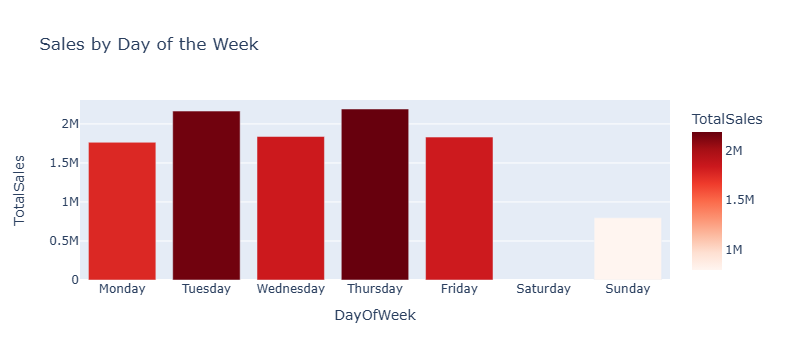

In [177]:
# Sales by Day of the Week
clean_data['DayOfWeek'] = clean_data.index.day_name()
daywise_sales = clean_data.groupby('DayOfWeek')['TotalSales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
print("\nSales by Day of the Week:")
print(daywise_sales)

fig_daywise_sales = px.bar(daywise_sales, x='DayOfWeek', y='TotalSales',
                           title='Sales by Day of the Week',
                           color='TotalSales', color_continuous_scale='reds')
fig_daywise_sales.show()

**📌 Sales by Day of the Week:**
- **Tuesday** and **Thursday** record the highest sales (over 2.1M each).  
- **Sunday** shows the lowest sales (~797k).  
- *Observation:* The absence of Saturday sales (NaN) suggests no transactions—possibly due to store closure or data collection issues.


Sales by Hour:
    Hour   TotalSales
0      6        4.250
1      7    31059.210
2      8   283660.080
3      9   989172.901
4     10  1441001.661
5     11  1226420.220
6     12  1432471.050
7     13  1248997.910
8     14  1171175.561
9     15  1341119.710
10    16   749559.120
11    17   459568.270
12    18   144513.660
13    19    49589.640
14    20    18639.440


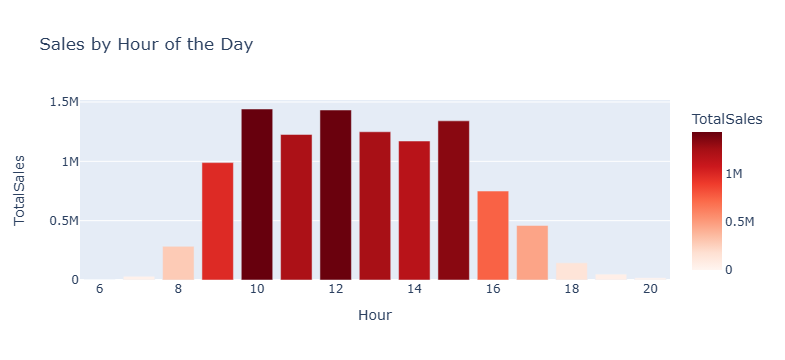

In [180]:
# Sales by Hour of the Day
clean_data['Hour'] = clean_data.index.hour
hourly_sales = clean_data.groupby('Hour')['TotalSales'].sum().reset_index()
print("\nSales by Hour:")
print(hourly_sales)

fig_hourly_sales = px.bar(hourly_sales, x='Hour', y='TotalSales',
                          title='Sales by Hour of the Day',
                          color='TotalSales', color_continuous_scale='reds')
fig_hourly_sales.show()

**📌 Hourly Sales:**
  - Peak transaction hours are between **10 AM and 3 PM**.  
  - Sales drop sharply after 5 PM, aligning with standard business hours.

### **🔹 Step 5: Distribution & Correlation Analysis**

Let's inspect the unit price distribution and see how key variables correlat.


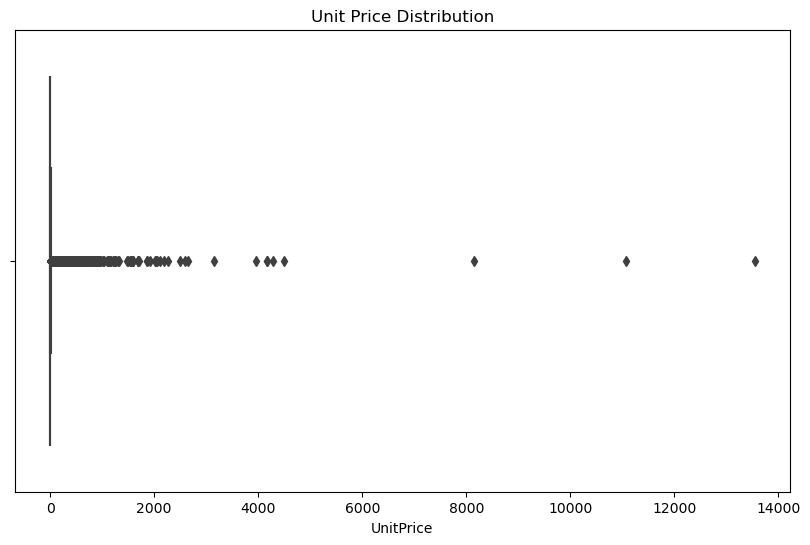

In [184]:
# Unit Price Distribution using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=clean_data['UnitPrice'])
plt.title('Unit Price Distribution')
plt.show()

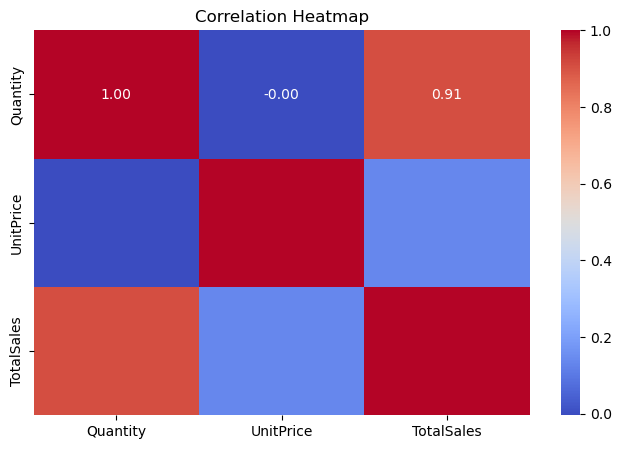

In [186]:
# Correlation Heatmap for key variables
plt.figure(figsize=(8, 5))
sns.heatmap(clean_data[['Quantity', 'UnitPrice', 'TotalSales']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**📌 Correlation Insights:**  
  - **Quantity vs. TotalSales:** Strong positive correlation (0.91) indicates that increasing the number of items sold boosts revenue.
  - **UnitPrice vs. TotalSales:** Little to no correlation (around -0.2 to 0.0) suggests that raising prices does not necessarily increase revenue.

**📌 Business Recommendations:**  
  - **Volume-Based Promotions:**  
    - 📦 **Bundle Discounts:** Offer product bundles at a reduced price.
    - 🔁 **Subscription & Loyalty Programs:** Reward frequent buyers with exclusive deals.
    - 🤝 **Cross-Selling Discounts:** Suggest related products when bought together.
- *Additional Note:* Analyzing the impact of **return transactions (negative quantities)** separately could provide further actionable insights.

---

## 💡 Summary of Insights

### 1. Data Quality & Cleaning
- **Incomplete Transactions:**  
  Over **135K transactions** were flagged as incomplete due to missing descriptions, zero unit prices, or missing CustomerID (common in guest checkouts). Negative values generally represent returns/refunds.
- **Data Cleaning Measures:**  
  Placeholder entries (e.g., “?”, “damages”, “samples”) and very short descriptions were removed to improve data quality. Cancelled transactions and duplicates were dropped, resulting in a refined dataset for analysis.

### 2. Regional Performance & Top Products Analysis
- **Regional Sales Dominance:**  
  The **United Kingdom** leads with total sales of approximately **$8.96M**, with other notable contributions from the Netherlands, EIRE, Germany, and France.
- **Top Products Insight:**  
  Visualizations of the top 10 products by total sales highlight the best-selling items. This analysis can guide targeted marketing and inventory optimization strategies by focusing on high-performing products.

### 3. Time Series & Transaction Patterns
- **Yearly Trends:**  
  Sales grow dramatically from **December 2010 (812k)** to **December 2011 (9.77M)**. Note that 2010 data only covers December.
- **Monthly Trends:**  
  A seasonal pattern emerges with a December peak, a post-holiday dip in January, and a recovery in March.
- **Weekly & Daily Patterns:**  
  Weekly trends show a peak during the week of December 12, 2010, while day-of-week analysis indicates highest sales on Tuesday and Thursday, and the lowest on Sunday. The absence of Saturday sales suggests either store closure or data collection issues.
- **Hourly Trends:**  
  Transactions peak between **10 AM and 3 PM**, aligning with standard business hours.

### 4. Correlation & Business Strategy
- **Key Correlations:**  
  A strong correlation (0.91) between **Quantity** and **Total Sales** indicates that increasing the number of items sold has a direct impact on revenue. In contrast, **Unit Price** shows little to no correlation with Total Sales.
- **Strategic Implications:**  
  Focus on volume-based promotions, such as bundle discounts, subscription/loyalty programs, and cross-selling offers, rather than relying solely on price adjustments to drive revenue growth.
  
---

**Overall, the analysis supports a strategy focused on boosting sales volume and optimizing operational efficiency. The insights across regional performance, top product identification, temporal trends, and correlation analysis provide a solid basis for targeted marketing, staffing, and inventory management decisions.** 😃
management decisions.** 😃
